# Movie Genre Data Analysis

### Introduction: 
In this project I focus on genre's of movies.There's a good deal of information I am trying to get from this data. Here are some things I'm going to look at

## Research Questions (Q):
1. Which genres are the most common (number of movies made)?
2. Which genres have high avg. budget and revenue?
    - Which genres have the highest avg profit?
3. Which genres have a high avg. popularity?
4. Which genres have the highest number of movies with a voting avg. >= 8?

## Research Hypothesis (H):
1. The best movies acording to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.
5. An initial look at the profit per genre per year

In [99]:
# Import pandas and read in dataset. Set max rows/columns and get a quick glimpse as to what the data looks like

import pandas as pd

movies = pd.read_csv(r'C:\Users\wgephar\OneDrive - Purdue Research Foundation\Python\imdb_movies.csv')
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)
movies.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  \
0              The park is open.   
1             What a Lovely Day.   
2     One Choice Can Destroy You   
3  Every generation has a story.   
4            Vengeance Hits Home   

                                            keywords  \
0  monster|dna|tyrannosaurus rex|velociraptor|island   
1   future|chase|post-apocalyptic|dystopia|australia   
2  based on novel|revolution|dystopia|sequel|dyst...   
3              android|spaceship|jedi|space opera|3d   
4                car race|speed|revenge|suspense|car   

                                            overview  runtime  \
0  Twenty-two years after the events of Jurassic ...      124   
1  An apocalyptic story set in the furthest reach...      120   
2  Beatrice Prior must confront her inner demons ...      119   
3  Thirty years after defeating the Galactic Empi...      136   
4  Deckard Shaw seeks revenge against Dominic Tor...      137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15        5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15        2947   

   vote_average  release_year       budget_adj       revenue_adj  
0      6.500000          2015 137999939.280026 1392445892.523800  
1      7.100000          2015 137999939.280026  348161292.489031  
2      6.300000          2015 101199955.472019  271619025.407628  
3      7.500000          2015 183999919.040035 1902723129.801820  
4      7.300000          2015 174799923.088033 1385748801.470520

In [17]:
# Identifying and removing duplicated rows (we identified that there was in fact 1 duplicated row)
#movies[movies.duplicated()]

movies.drop_duplicates(inplace = True)

Empty DataFrame
Columns: [id, imdb_id, popularity, budget, revenue, original_title, cast, homepage, director, tagline, keywords, overview, runtime, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [18]:
# The analysis I will be doing will be based on the genre field so I want to make sure that field is fully populated and doesn't have any null values.
# We will go ahead and remove any row that has a null value in the genre column

movies.dropna(subset = ['genres'], inplace = True)

In [21]:
#Create an additional field "profit" to calculate how much money each individual movie made

movies['profit'] = movies['revenue'] - movies['budget']

In [128]:
# Keep any columns that we need or are planning on using for our analysis

movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_year', 'vote_average', 'vote_count', 'profit']]
movies_genre

popularity     budget     revenue  \
0       32.985763  150000000  1513528810   
1       28.419936  150000000   378436354   
2       13.112507  110000000   295238201   
3       11.173104  200000000  2068178225   
4        9.335014  190000000  1506249360   
5        9.110700  135000000   532950503   
6        8.654359  155000000   440603537   
7        7.667400  108000000   595380321   
8        7.404165   74000000  1156730962   
9        6.326804  175000000   853708609   
10       6.200282  245000000   880674609   
11       6.189369  176000003   183987723   
12       6.118847   15000000    36869414   
13       5.984995   88000000   243637091   
14       5.944927  280000000  1405035767   
15       5.898400   44000000   155760117   
16       5.749758   48000000   325771424   
17       5.573184  130000000   518602163   
18       5.556818   95000000   542351353   
19       5.476958  160000000   650523427   
20       5.462138  190000000   209035668   
21       5.337064   30000000    91709827   
22       4.907832  110000000   470490832   
23       4.710402   40000000   569651467   
24       4.648046   28000000   133346506   
25       4.566713  150000000   682330139   
26       4.564549   68000000   215863606   
27       4.503789   81000000   403802136   
28       4.062293   20000000    88346473   
29       3.968891   61000000   311256926   
30       3.927333          0    29355203   
31       3.899557   49000000   102069268   
32       3.877764   29000000   287506194   
33       3.648210   40000000   162610473   
34       3.644541   58000000   150170815   
35       3.557846    6000000    35401758   
36       3.358321          0    22354572   
37       3.339135  175000000   331926147   
38       3.237370   50000000    71561644   
39       3.227329   11000000    62076141   
40       3.202719   28000000   201634991   
41       3.080505   90000000   140396650   
42       3.079522   30000000    34441873   
43       3.053421   75000000   108145109   
44       3.025852   25000000    42629776   
45       3.023253   10000000    14333790   
46       2.976436  135000000   368871007   
47       2.968254   12000000    85512300   
48       2.932340   30000000           0   
49       2.885126    4000000     9064511   
50       2.883233   11800000    40272135   
51       2.814802   35000000   194564672   
52       2.798017   55000000   203427584   
53       2.793297   60000000   101134059   
54       2.614499  105000000   133718711   
55       2.584264   20000000    36606743   
56       2.578919   26000000    30523226   
57       2.575711   60000000    30418560   
58       2.557859   15000000    64191523   
59       2.550747   70000000    17752940   
60       2.487849   30000000    84025816   
61       2.487042  120000001   167977596   
62       2.464490    3500000    40423945   
63       2.404473   65000000   235666219   
64       2.395366   50100000   153962963   
65       2.354654   35000000    82347656   
66       2.345821  100000000    93820758   
67       2.331636   20000000           0   
68       2.331567   35000000   137935567   
69       2.317670   35000000   140795793   
70       2.295730   13000000    32848185   
71       2.281350   25000000    42972994   
72       2.272044          0       45895   
73       2.234573  150000000   128388320   
74       2.165433          0           0   
75       2.141506          0           0   
76       2.140199   99000000   246233113   
77       2.121884   35000000    48623572   
78       2.096273   25000000    52395996   
79       2.080935    2500000     5214043   
80       2.070708   34000000    63013281   
81       2.060162   80000000   466183544   
82       2.055572   17000000    24000000   
83       2.049886   35000000    61181942   
84       2.026651   11000000     1863315   
85       2.000338   31000000   104384188   
86       1.984529   35000000    95437994   
87       1.980039    4000000      187112   
88       1.959765          0     2000000   
89       1.956320   50000000     3324330   
90 

In [129]:
# Bring in Series, Dataframe and split up the genres field so that we can more easily do analysis on each individual genre
# Stack the genres on the y index and then drop the level and create a series

from pandas import Series, DataFrame
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genres_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)

C:\Users\wgephar\AppData\Local\Temp\1\ipykernel_39428\3510498609.py:5: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


## Research Questions (Q):
1. Which genres are the most common (number of movies made)?

In [71]:
#Create a dataframe detailing the number of movies that fall into each genre. Group the values and sort them descending. 
#The dataframe creation negates the need for a reset index later on.

genres_count = pd.DataFrame(movies_genre.groupby('genres_split').original_title.nunique()).sort_values('original_title', ascending = True)

<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

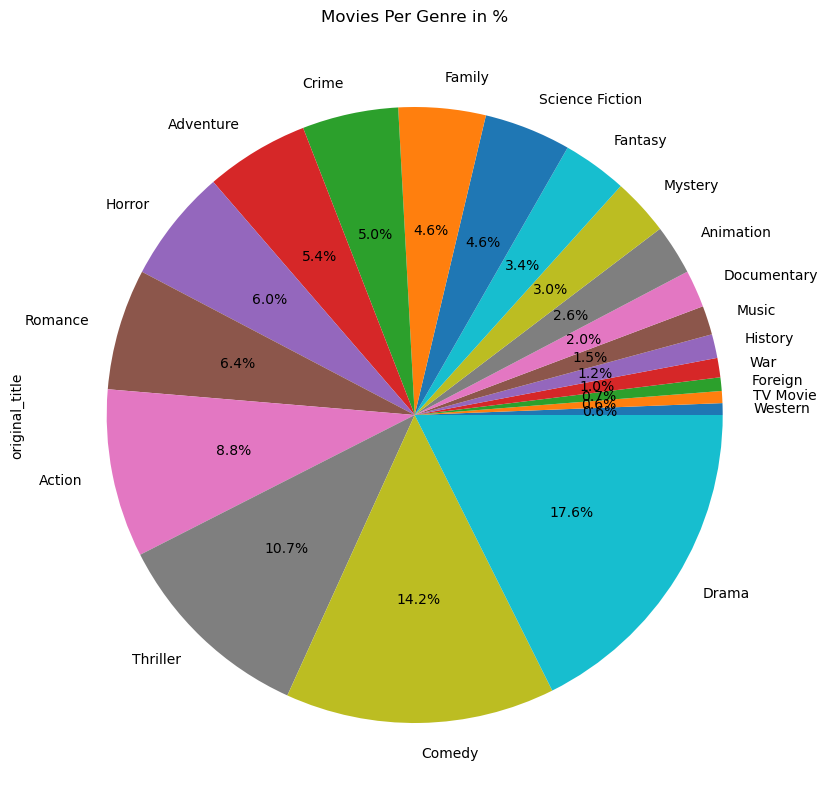

In [72]:
# Creating a pie chart to visualize the genres_count dataframe so we can more easily see the distribution of genres

genres_count['original_title'].plot.pie(title = 'Movies Per Genre in %', autopct= '%1.1f%%', figsize = (10,10))

<Axes: title={'center': 'Movies Per Genre'}, ylabel='genres_split'>

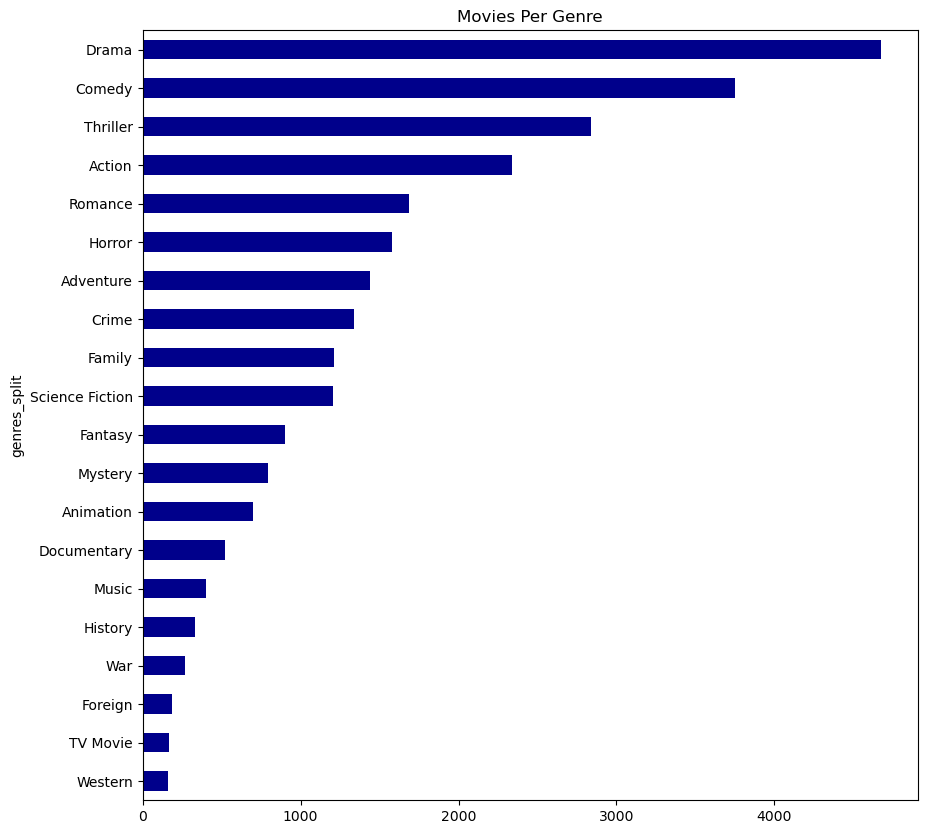

In [73]:
# Creating a horizontal bar chart to visualize the genres_count dataframe so we can more easily see the distribution of genres

genres_count['original_title'].plot.barh(title = 'Movies Per Genre', figsize = (10,10), color = 'DarkBlue')

## Research Questions (Q):
2. Which genres have high avg. budget and revenue?
   - Which genres have the highest avg profit?


In [80]:
#Calculate the averages of each column based on genre so that we can decide which column to look at 

genres_avg = movies_genre.groupby('genres_split').mean(numeric_only = True)
pd.options.display.float_format = '{:2f}'.format

popularity          budget          revenue    runtime  \
genres_split                                                              
Action             0.926274 27727820.331376  72794732.002517 104.917785   
Adventure          1.154259 37543694.530931 113137861.069341 106.173351   
Animation          0.852182 23159781.606581  75256062.223176  68.181688   
Comedy             0.592607 13297915.618244  37526242.072238  96.745057   
Crime              0.744930 17663801.124815  42368661.645495 106.917282   
Documentary        0.181432   577149.148077   2041106.994231 102.651923   
Drama              0.591495 11880717.773529  29232255.725840 110.478151   
Family             0.786668 23359337.420796  72433176.373680  89.603574   
Fantasy            0.992840 32612585.348253  96313657.081878 100.736900   
Foreign            0.191496  1451434.925532   1520459.835106 107.228723   
History            0.575936 18594919.302395  32011793.215569 136.206587   
Horror             0.465357  6226529.210751  16822808.624313  94.424557   
Music              0.487321  9438627.549020  28571768.691176 105.137255   
Mystery            0.690012 16119270.062963  40217566.661728 105.928395   
Romance            0.592082 12531271.847547  35691972.327103 106.891355   
Science Fiction    1.001548 24972680.524003  70140558.034174  99.419854   
TV Movie           0.270896   267664.670659    251497.005988  91.982036   
Thriller           0.741563 17207693.769178  41728417.543860 103.247678   
War                0.727683 20891886.103704  47605183.300000 127.625926   
Western            0.590615 18974107.975758  28568709.284848 117.575758   

                 vote_average  vote_count          profit  
genres_split                                               
Action               5.787752  392.993708 45066911.671141  
Adventure            5.940585  513.125085 75594166.538409  
Animation            6.403147  303.000000 52096280.616595  
Comedy               5.905167  176.436330 24228326.453994  
Crime                6.124889  278.805022 24704860.520679  
Documentary          6.908462   35.105769  1463957.846154  
Drama                6.165546  182.544538 17351537.952311  
Family               5.997563  272.320877 49073838.952884  
Fantasy              5.863537  420.741266 63701071.733624  
Foreign              5.981383   16.627660    69024.909574  
History              6.410479  183.772455 13416873.913174  
Horror               5.337447  120.059866 10596279.413561  
Music                6.480392  124.340686 19133141.142157  
Mystery              5.946790  236.998765 24098296.598765  
Romance              6.042874  166.070678 23160700.479556  
Science Fiction      5.665582  437.096013 45167877.510171  
TV Movie             5.788024   34.365269   -16167.664671  
Thriller             5.750671  255.484348 24520723.774682  
War                  6.297778  270.733333 26713297.196296  
Western              6.083030  205.739394  9594601.309091

<Axes: title={'center': 'Budget and Revenue by Genre'}, ylabel='genres_split'>

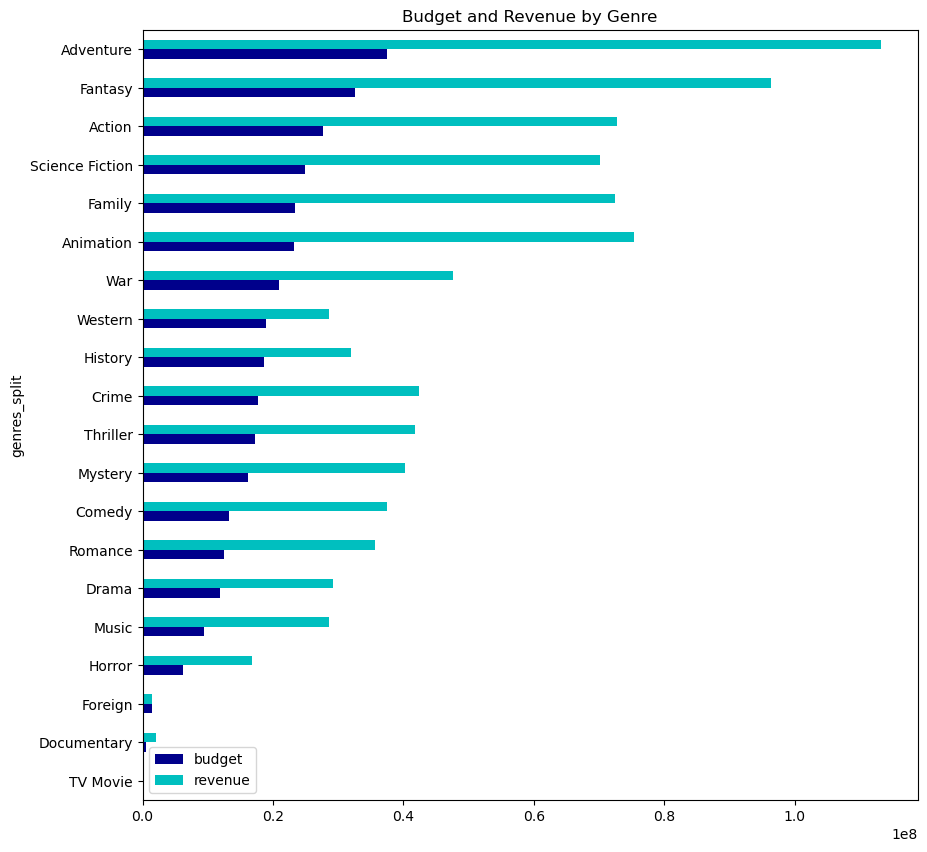

In [84]:
#Sort the values ascending based on the budget and create a horizontal bar plot comparing budget and renue based on genre

genres_avg.sort_values('budget', ascending = True, inplace = True)
genres_avg[['budget', 'revenue']].plot.barh(title = 'Budget and Revenue by Genre', figsize = (10,10), color = ('DarkBlue', 'c'))

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

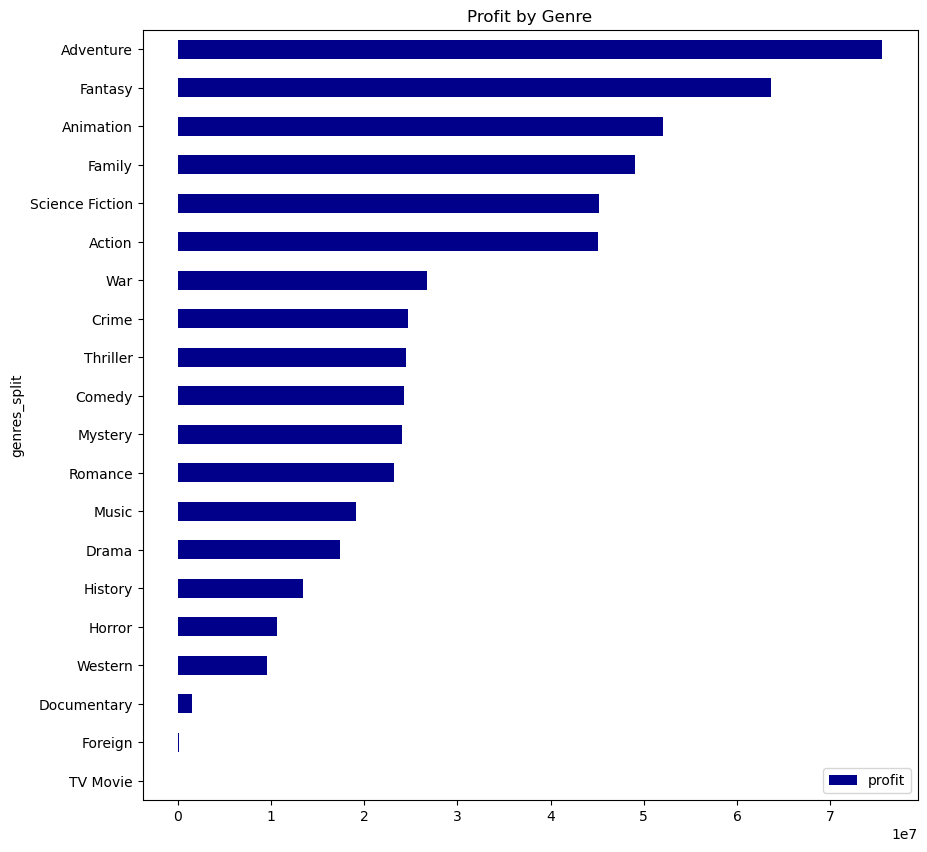

In [85]:
#Now we are going to calculate which movies have the highest average profit answering question 2.5

genres_avg.sort_values('profit', ascending = True, inplace = True)
genres_avg[['profit']].plot.barh(title = 'Profit by Genre', figsize = (10,10), color = 'DarkBlue')

## Research Questions (Q):

3. Which genres have a high avg. popularity?

<Axes: title={'center': 'Profit by Genre'}, ylabel='genres_split'>

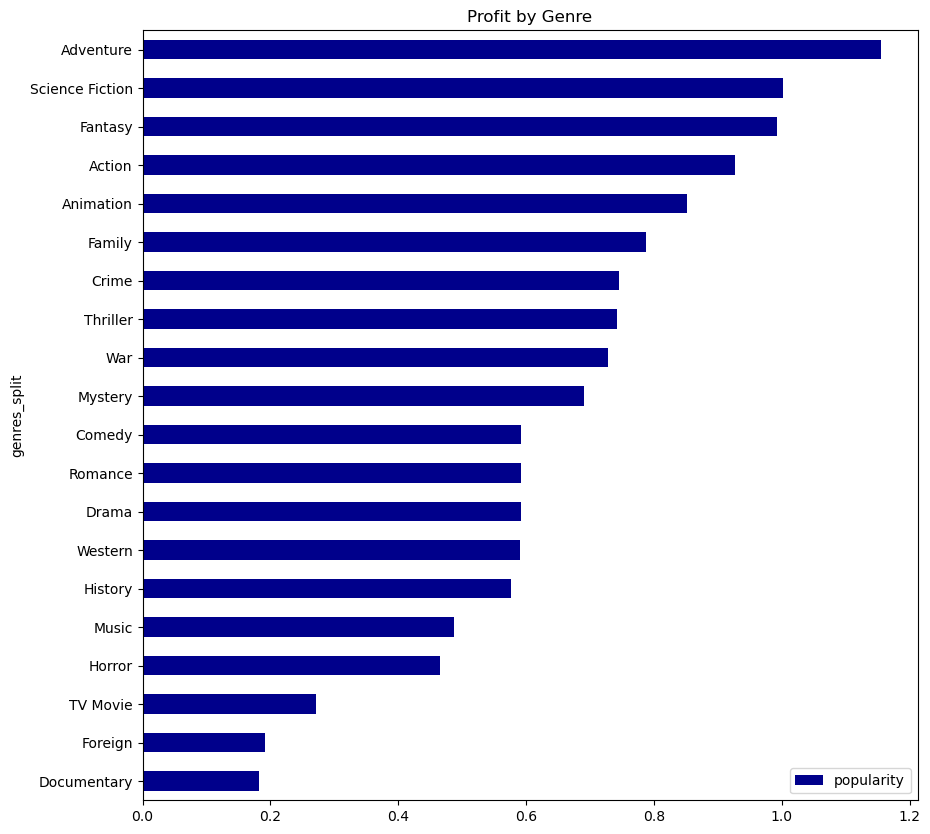

In [87]:
# Creating an additional bar chart to calculate the average popularity by genre to answer question 3. 

genres_avg.sort_values('popularity', ascending = True, inplace = True)
genres_avg[['popularity']].plot.barh(title = 'Popularity by Genre', figsize = (10,10), color = 'DarkBlue')

## Research Questions (Q):
4. Which genres have the highest number of movies with a voting avg. >= 8?

In [93]:
# Filtering down the dataset so that the vote_count is greater than 50 and we aren't looking at movies that have very few reviews and whose vote_average might skew our results
# I also did an additional analysis including movies whose vote count was less than 50 just to see the difference.
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)]
vote_zero = movies_genre[movies_genre['vote_average'] >=8]

<Axes: title={'center': 'Vote Avreage by Genre'}, ylabel='genres_split'>

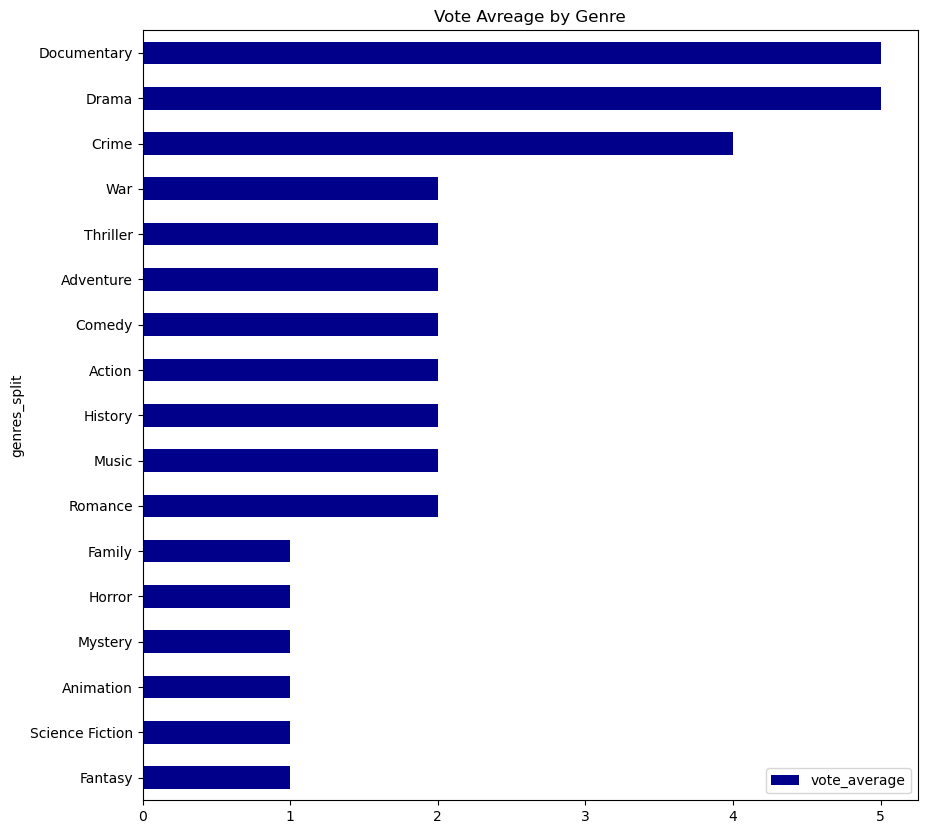

In [96]:
# Again creating another dataframe so that we can visualize the vote average for the > 50 dataframe.

genres_vote = pd.DataFrame(vote_fifty.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote[['vote_average']].plot.barh(title = 'Vote Avreage by Genre', figsize = (10,10), color = 'DarkBlue')

<Axes: title={'center': 'Vote Avreage by Genre'}, ylabel='genres_split'>

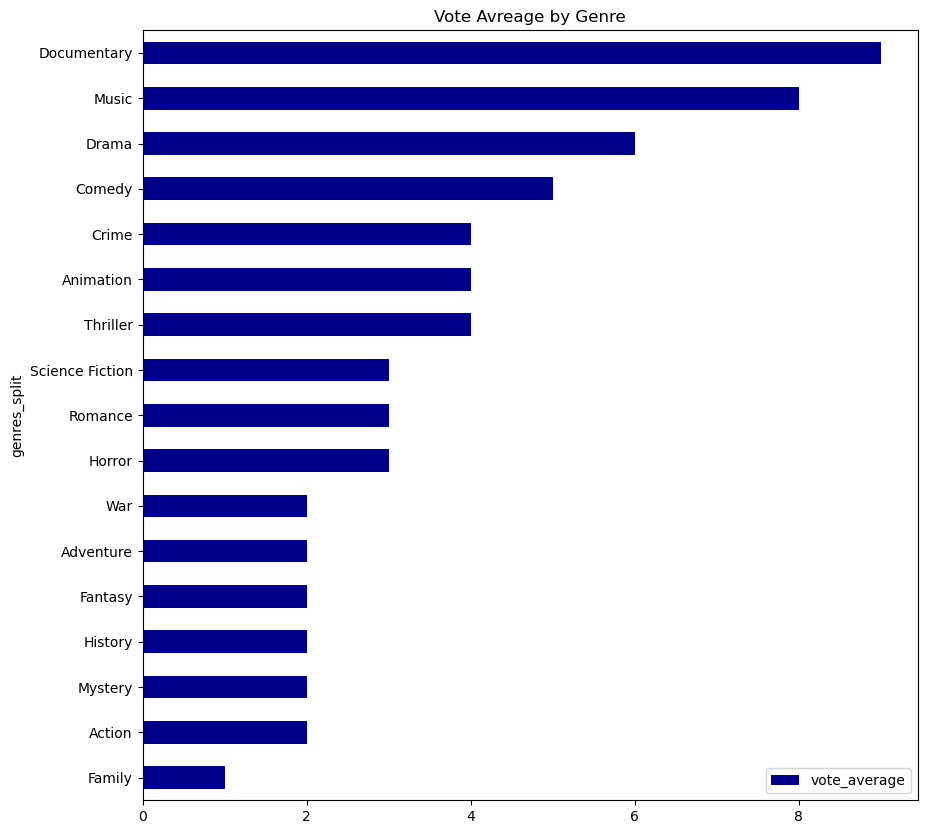

In [98]:
# Creating another visualization so that we can visualize the vote average for the > 0 dataframe.


genres_vote = pd.DataFrame(vote_zero.groupby('genres_split').vote_average.nunique()).sort_values('vote_average', ascending = True)
genres_vote[['vote_average']].plot.barh(title = 'Vote Avreage by Genre', figsize = (10,10), color = 'DarkBlue')

## Research Hypothesis (H):
1. The best movies acording to vote avg. return high profit and revenue.
2. The best movies according to popularity return high profit and revenue.
3. Highly budgeted movies return high revenue and profit.
4. Highly budgeted movies have a high popularity.

In [101]:
#Reread in the file and run this code so that we can work on the code fresh for our hypothesis questions:

movies = pd.read_csv(r'C:\Users\wgephar\OneDrive - Purdue Research Foundation\Python\imdb_movies.csv')
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 22)
movies.head()
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'revenue', 'original_title', 'runtime', 'genres', 'release_date', 'vote_average', 'vote_count', 'profit']]

## Research Hypothesis (H):
1. The best movies acording to vote avg. return high profit and revenue.
    - After the analysis below we can see that there is a positive correlation between vote average and profit/revnue. However, the relationship is not as significant as I expected it to be so it's not necessarily the best predictor of how a movie will perform. 

In [108]:
# Filtering down the dataset so that the vote_count is greater than 50 and we aren't looking at movies that have very few reviews and whose vote_average might skew our results
# Also used a pearson spearman correlation coefficient so we can take a look at our first research question

movies_counted = movies_genre[movies_genre['vote_count'] >= 50]

movies_counted.corr(method = 'spearman', numeric_only = True)

popularity    budget  revenue  runtime  vote_average  \
popularity      1.000000  0.485149 0.588739 0.230518      0.188670   
budget          0.485149  1.000000 0.714828 0.360230     -0.044440   
revenue         0.588739  0.714828 1.000000 0.341707      0.111731   
runtime         0.230518  0.360230 0.341707 1.000000      0.285514   
vote_average    0.188670 -0.044440 0.111731 0.285514      1.000000   
vote_count      0.768966  0.554586 0.682656 0.263460      0.284470   
profit          0.498117  0.334390 0.842221 0.212060      0.198308   

              vote_count   profit  
popularity      0.768966 0.498117  
budget          0.554586 0.334390  
revenue         0.682656 0.842221  
runtime         0.263460 0.212060  
vote_average    0.284470 0.198308  
vote_count      1.000000 0.583602  
profit          0.583602 1.000000

<Axes: xlabel='vote_average', ylabel='profit'>

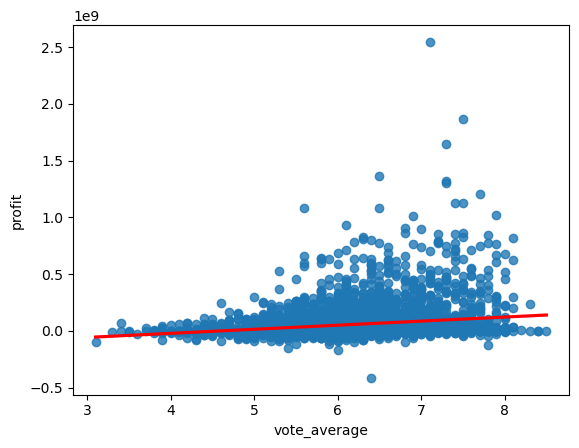

In [113]:
# Import seaborn and run a regplot so that we can see the correlation with a linear regression line that tells how how significant the relationship between profit and vote_average is


import seaborn as sns

sns.regplot(x = 'vote_average', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

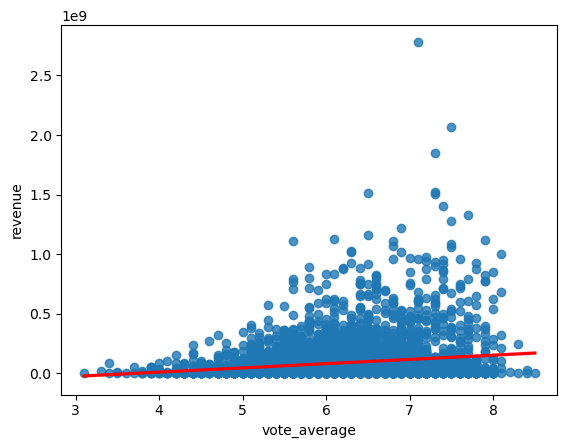

In [114]:
# Run a regplot so that we can see the correlation with a linear regression line that tells how how significant the relationship between revenue and vote_average is

sns.regplot(x = 'vote_average', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})

## Research Hypothesis (H):
2. The best movies according to popularity return high profit and revenue.
    - As you can see by our analysis below, we have a much higher correlation here than in question 1 which tells us that profit and revenue are both decent predictors of how well a movie did in it's popularity rating. 

In [115]:
# Run a spearman correlation to now get an idea of the relationship between popularity and profit/revenue

movies_counted.corr(method = 'spearman', numeric_only = True)

popularity    budget  revenue  runtime  vote_average  \
popularity      1.000000  0.485149 0.588739 0.230518      0.188670   
budget          0.485149  1.000000 0.714828 0.360230     -0.044440   
revenue         0.588739  0.714828 1.000000 0.341707      0.111731   
runtime         0.230518  0.360230 0.341707 1.000000      0.285514   
vote_average    0.188670 -0.044440 0.111731 0.285514      1.000000   
vote_count      0.768966  0.554586 0.682656 0.263460      0.284470   
profit          0.498117  0.334390 0.842221 0.212060      0.198308   

              vote_count   profit  
popularity      0.768966 0.498117  
budget          0.554586 0.334390  
revenue         0.682656 0.842221  
runtime         0.263460 0.212060  
vote_average    0.284470 0.198308  
vote_count      1.000000 0.583602  
profit          0.583602 1.000000

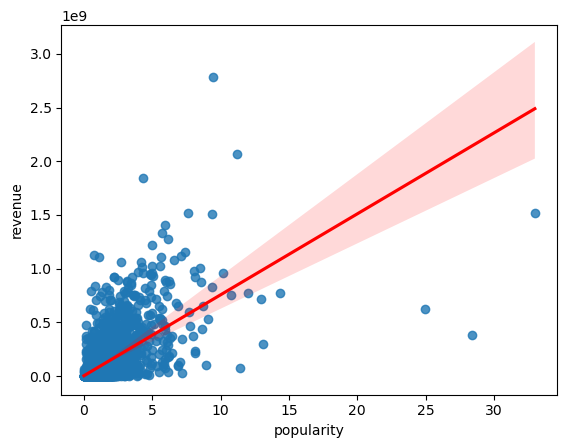

<Figure size 1000x1500 with 0 Axes>

In [123]:
# Creating another linear regression plot to show the relationship between popularity and revenue.
# Also importing matplotlib so that we can adjust the figsize of the graph
import matplotlib.pyplot as plt

sns.regplot(x = 'popularity', y = 'revenue', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,15))
plt.show()

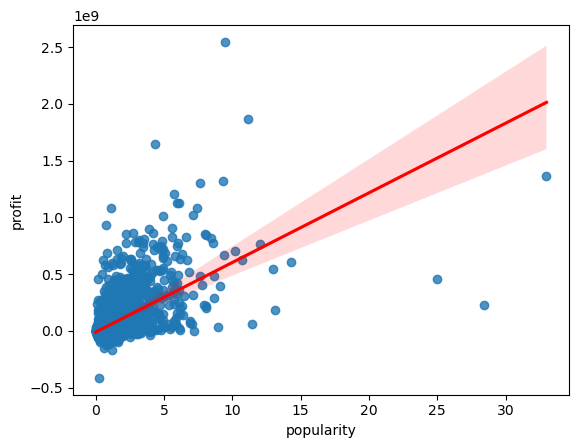

<Figure size 1000x1500 with 0 Axes>

In [124]:
sns.regplot(x = 'popularity', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,15))
plt.show()

## Research Hypothesis (H):
3. Highly budgeted movies return high revenue and profit.

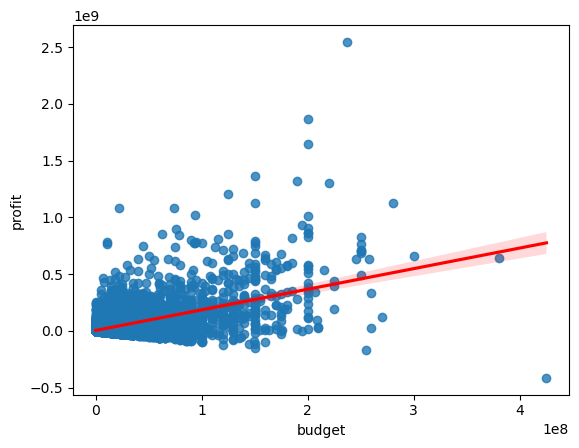

<Figure size 1000x1500 with 0 Axes>

In [126]:
sns.regplot(x = 'budget', y = 'profit', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,15))
plt.show()

## Research Hypothesis (H):
4. Highly budgeted movies have a high popularity.

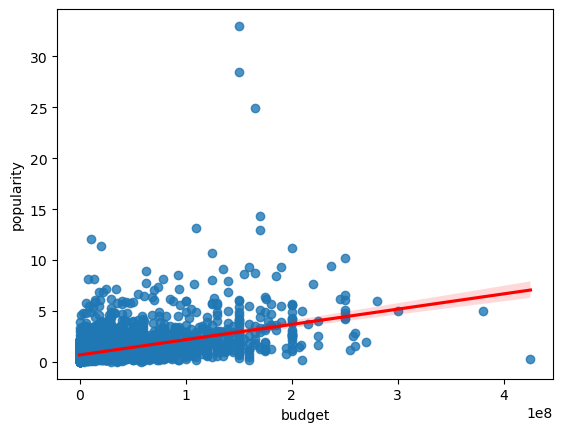

<Figure size 1000x1500 with 0 Axes>

In [127]:
sns.regplot(x = 'budget', y = 'popularity', data = movies_counted, line_kws = {"color": 'red'})
plt.figure(figsize = (10,15))
plt.show()

## Research Hypothesis (H):
5. An initial look at the profit per genre per year

In [133]:
# Create a dataframe grouping by the release_year and the genres_split and averageing the profit for those groupings

time_genre = pd.DataFrame(movies_genre.groupby(['release_year', 'genres_split'])['profit'].mean())

In [136]:
# Creating a pivot table so that the year is on the x axis and the genres_split is on the y axis

final_genre = pd.pivot_table(time_genre, values = 'profit', index = ['genres_split'], columns = ['release_year'])

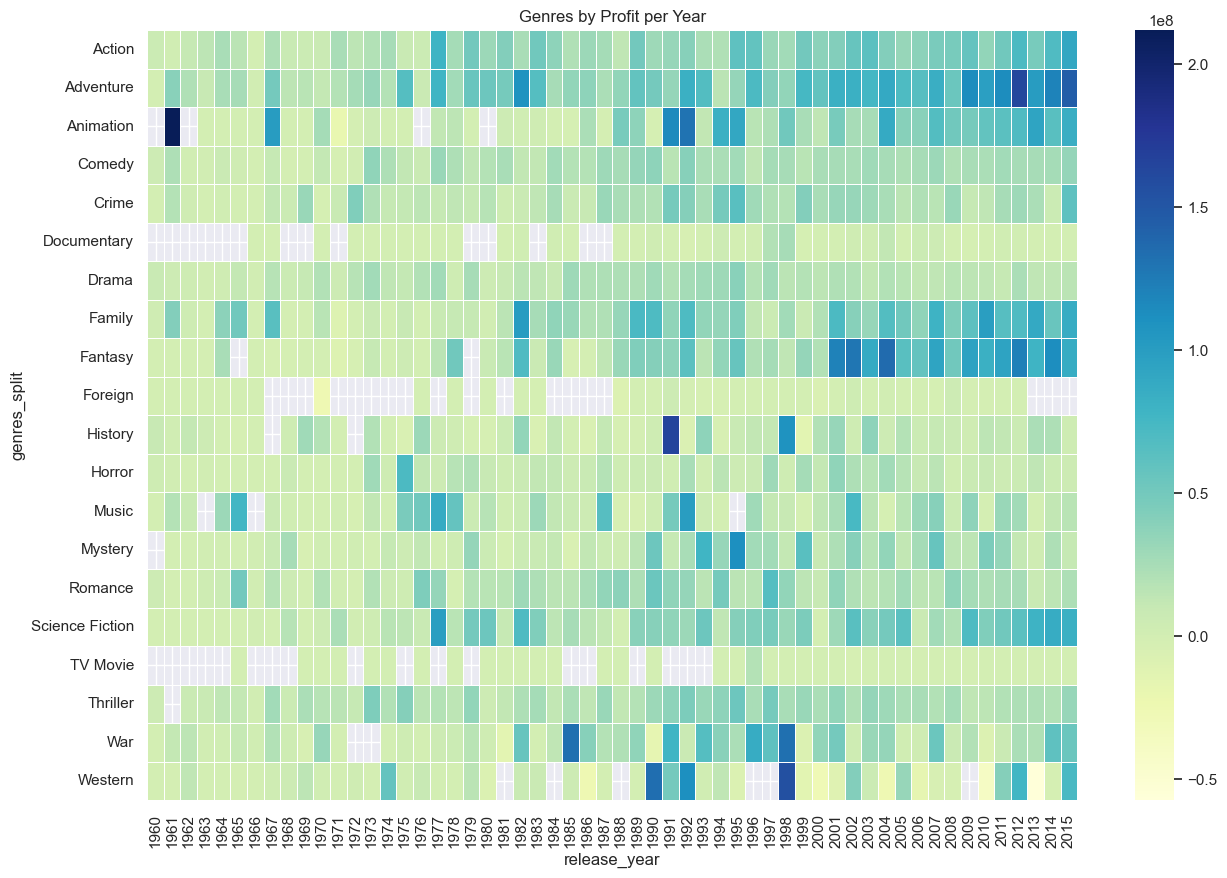

In [144]:
sns.set(rc = {'figure.figsize': (15,10)})
sns.heatmap(data = final_genre, cmap = 'YlGnBu', linewidths = .5)
plt.title('Genres by Profit per Year')
plt.show()